In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.io import wavfile
import scipy.fftpack as fftpack
%matplotlib inline

In [2]:
sampling_freq, ilber_sample = wavfile.read("ilber/ilber_4.wav")
sampling_freq, esg_sample = wavfile.read("esg/esg_0.wav")
ilber_sample_L = ilber_sample[:,0]; ilber_sample_R = ilber_sample[:,1]
esg_sample_L = esg_sample[:,0]; esg_sample_L = esg_sample[:,1]

Ilber 4 Shape: (220501, 2)


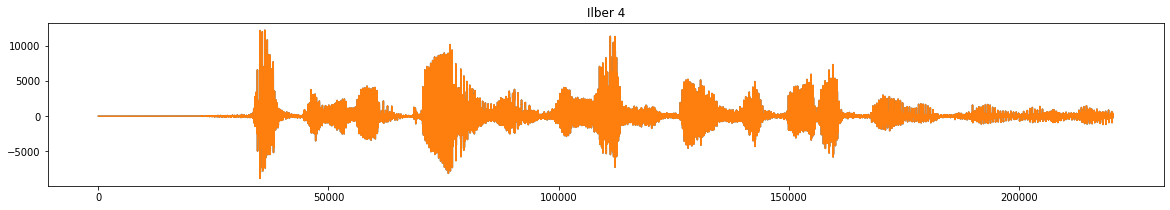

In [3]:
fig, ax = plt.subplots(figsize=(20,3))
ax.set_title("Ilber 4")
print("Ilber 4 Shape: {}".format(ilber_sample.shape))
ax.plot(ilber_sample)

ESG 0 Shape: (220501, 2)


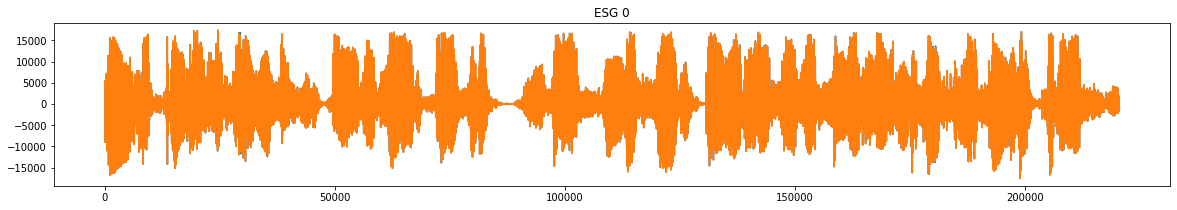

In [4]:
fig, ax = plt.subplots(figsize=(20,3))
ax.set_title("ESG 0")
print("ESG 0 Shape: {}".format(esg_sample.shape))

ax.plot(esg_sample)

In [1]:
freqs = fftpack.fftfreq(len(ilber_sample_L))*sampling_freq

ilber_sample_L_norm = ilber_sample_L/max(abs(ilber_sample_L))
ilber_fft = fftpack.fft(ilber_sample_L_norm)
# ilber_fft_magn = np.sqrt(np.square(ilber_fft.real)+np.square(ilber_fft.imag))
ilber_fft_magn = np.abs(ilber_fft)

plt.figure(figsize=(12, 5))
plt.title("Ilber 4 FFT Magnitude")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(-sampling_freq/2, sampling_freq/2)
plt.plot(freqs, ilber_fft_magn)

NameError: name 'fftpack' is not defined

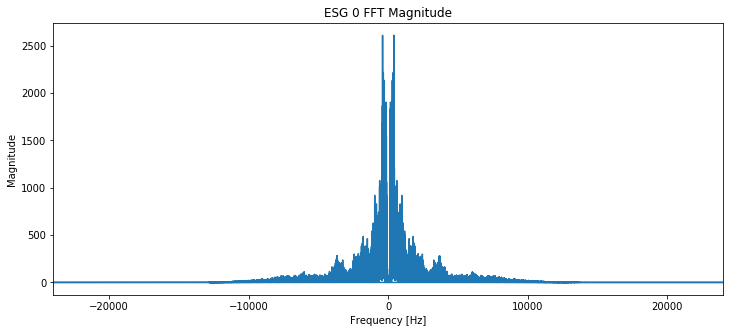

In [6]:
esg_sample_L_norm = esg_sample_L/max(abs(esg_sample_L))
esg_fft = fftpack.fft(esg_sample_L_norm)
# esg_fft_magn = np.sqrt(np.square(esg_fft.real)+np.square(esg_fft.imag))
esg_fft_magn = np.abs(esg_fft)

plt.figure(figsize=(12, 5))
plt.title("ESG 0 FFT Magnitude")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(-sampling_freq/2, sampling_freq/2)
plt.plot(freqs, esg_fft_magn)

In [7]:
from os import listdir
from os.path import isfile, join

In [8]:
ilber_data = [f for f in listdir("ilber") if isfile(join("ilber", f))]
esg_data = [f for f in listdir("esg") if isfile(join("esg", f))]
test_data = [f for f in listdir("test") if isfile(join("test", f))]

sampling_freq, ilber_sample = wavfile.read(join("ilber", ilber_data[0]))
freqs = fftpack.fftfreq(len(ilber_sample[:,0]))*sampling_freq

In [9]:
ilber_total = 0
for audio_name in ilber_data:
    sampling_freq, ilber_audio = wavfile.read(join("ilber", audio_name))
    ilber_audio_L = ilber_audio[:,0]
    ilber_audio_L_norm = ilber_audio_L/max(abs(ilber_audio_L))
    ilber_fft = fftpack.fft(ilber_audio_L_norm)
    ilber_fft_magn = np.abs(ilber_fft)
    
    ilber_total += np.mean(ilber_fft_magn)

ilber_mean = ilber_total/len(ilber_data)
print("Mean Magnitude of Ilber's FFT: {}".format(ilber_mean))

Mean Magnitude of Ilber's FFT: 12.285599443074032


In [10]:
esg_total = 0
for audio_name in esg_data:
    sampling_freq, esg_audio = wavfile.read(join("esg", audio_name))
    esg_audio_L = esg_audio[:,0]
    esg_audio_L_norm = esg_audio_L/max(abs(esg_audio_L))
    esg_fft = fftpack.fft(esg_audio_L_norm)
    esg_fft_magn = np.abs(esg_fft)
    
    esg_total += np.mean(esg_fft_magn)
    
esg_mean = esg_total/len(esg_data)
print("Mean Magnitude of ESG's FFT: {}".format(esg_mean))

Mean Magnitude of ESG's FFT: 33.15065639543514


In [11]:
ilber_test_data_amount = 0
esg_test_data_amount = 0
total_test_data_amount = len(test_data)

for audio_name in test_data:
    if "ilber" in audio_name:
        ilber_test_data_amount += 1
    else:
        esg_test_data_amount += 1

correct_pred = 0
wrong_pred = 0    
    
for audio_name in test_data:
    mean = (ilber_mean + esg_mean) / 2
   
    sampling_freq, test_audio = wavfile.read(join("test", audio_name))
    test_audio_L = test_audio[:,0]
    test_audio_L_norm = test_audio_L/max(abs(test_audio_L))
    test_fft = fftpack.fft(test_audio_L_norm)
    test_fft_magn = np.abs(test_fft)
    
    if np.mean(test_fft_magn) > mean:
        print("Audio file \"{}\" belongs to Emrah Sefa Gurkan".format(audio_name))
        if not "esg" in audio_name:
            wrong_pred += 1
        else:
            correct_pred +=1
    else:
        if not "ilber" in audio_name:
            wrong_pred += 1
        else:
            correct_pred +=1
        print("Audio file \"{}\" belongs to Ilber Ortayli".format(audio_name))
        
print("\n\nResults:\nCorrect Predictions:\t{}\nWrong Predictions:\t{}\nAmount of Test Data:\t{}\nAccuracy:\t{}%".format(correct_pred, wrong_pred, total_test_data_amount, 100*correct_pred/total_test_data_amount))

Audio file "esg_36.wav" belongs to Emrah Sefa Gurkan
Audio file "ilber_54.wav" belongs to Ilber Ortayli
Audio file "esg_44.wav" belongs to Emrah Sefa Gurkan
Audio file "ilber_72.wav" belongs to Ilber Ortayli
Audio file "ilber_55.wav" belongs to Ilber Ortayli
Audio file "ilber_67.wav" belongs to Ilber Ortayli
Audio file "esg_37.wav" belongs to Emrah Sefa Gurkan
Audio file "esg_38.wav" belongs to Emrah Sefa Gurkan
Audio file "ilber_52.wav" belongs to Ilber Ortayli
Audio file "ilber_50.wav" belongs to Ilber Ortayli
Audio file "ilber_66.wav" belongs to Ilber Ortayli
Audio file "ilber_65.wav" belongs to Ilber Ortayli
Audio file "ilber_68.wav" belongs to Ilber Ortayli
Audio file "ilber_70.wav" belongs to Ilber Ortayli
Audio file "ilber_71.wav" belongs to Ilber Ortayli
Audio file "esg_47.wav" belongs to Emrah Sefa Gurkan
Audio file "ilber_51.wav" belongs to Ilber Ortayli
Audio file "esg_40.wav" belongs to Emrah Sefa Gurkan
Audio file "esg_39.wav" belongs to Emrah Sefa Gurkan
Audio file "ilber